✅ Feedforward Neural Network (FNN)

A Feedforward Neural Network is the simplest type of neural network where data moves only in one direction — from input layer to hidden layers to output layer. There are no loops or backward connections. It learns patterns by adjusting weights to map input values to the correct output class.

✅ Activation Function

Activation functions decide whether a neuron should activate or not, helping the network learn complex patterns. They introduce non-linearity so the model can understand curves, edges, and real-world relationships instead of just straight-line patterns. Common ones here are ReLU in hidden layers and Softmax in the output layer.

✅ ReLU (Rectified Linear Unit)

ReLU outputs the input value if it's positive, otherwise it outputs zero. It helps the model learn faster and avoids the vanishing-gradient problem, making it ideal for hidden layers.

✅ Softmax Function

Softmax converts raw output values into probabilities that sum to 1. It helps the model decide which class (0–9 digit) is most likely, so it is used in the output layer for multi-class classification.

✅ Loss Function (Categorical Cross-Entropy)

The loss function measures how wrong the model's predictions are compared to the true labels. Categorical cross-entropy is used for multi-class problems like MNIST, and the goal is to reduce this loss with training.

✅ SGD (Stochastic Gradient Descent)

SGD is an optimization algorithm that updates weights step-by-step using small batches of data. It helps the model gradually reduce error and improve accuracy, making it a simple and effective learning method.

✅ Epoch

One epoch means the model has seen the entire training dataset once. More epochs allow the model to learn more, but too many may cause overfitting.

✅ Batch Size

Batch size decides how many samples are processed together before updating weights. Smaller batches (like 32) make training faster and help SGD learn gradually.

✅ Flatten Layer

Flatten converts the 2D image (28×28 pixels) into a 1D vector, so it can be passed to dense layers. It is the first step before feeding image data into fully-connected layers.

✅ Dense Layer

A dense layer has neurons fully connected to all inputs from the previous layer. It learns and combines features to make predictions in classification tasks.

✅ One-Hot Encoding

One-hot encoding converts labels (0-9) into vectors like [0 0 0 1 0 0 0 0 0 0]. This format helps the neural network handle multi-class output correctly.

✅ Accuracy

Accuracy measures how many predictions the model got right. Higher accuracy means better performance on the classification task.

Flatten Image → Dense → Dense → Output


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

# Split into data and labels
y_train = train_df.iloc[:, 0].values   # first column (label) from training data
x_train = train_df.iloc[:, 1:].values  # all columns except the first one

y_test = test_df.iloc[:, 0].values     # first column (label) from training data
x_test = test_df.iloc[:, 1:].values    # all columns except the first one

# faster training(normalize pixel values && train faster and more accurately)
x_train=x_train.astype('float32') / 255.0
x_test=x_test.astype('float32') / 255.0

# Reshape gives images their 2D spatial structure (Reshape to image format)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# Define Model Architecture
model=Sequential()
#It introduces non-linearity, allowing the network to learn complex patterns.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu',name='Hidden_Layer_1'))
model.add(Dense(10,activation='softmax',name='output_Layer'))

In [ ]:
# Train the model using SGD
# We use categorical crossentropy because the labels are one-hot encoded
#optimizers used to update a neural network’s weights to minimize the loss function during training

# Optimizer	Controls how weights get updated (e.g., Adam)
# Loss function	Tells model what to minimize, measures error (e.g., categorical_crossentropy)
# Metrics	What to monitor during training (e.g., accuracy)

# Stochastic Gradient Descent updates weights step-by-step using training data in batches to reduce loss and improve accuracy.

model.compile(loss='categorical_crossentropy',optimizer=SGD(learning_rate=0.001),metrics=['accuracy'])
model.summary()
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7487 - loss: 1.2431 - val_accuracy: 0.7839 - val_loss: 1.0583
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7837 - loss: 1.0330 - val_accuracy: 0.8102 - val_loss: 0.8945
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8093 - loss: 0.8812 - val_accuracy: 0.8281 - val_loss: 0.7787
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8244 - loss: 0.7762 - val_accuracy: 0.8388 - val_loss: 0.6947
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8403 - loss: 0.6932 - val_accuracy: 0.8491 - val_loss: 0.6323
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8472 - loss: 0.6383 - val_accuracy: 0.8579 - val_loss: 0.5843
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8539 - loss: 0.5975 - val_accuracy: 0.8673 - val_loss: 0.5461
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8609 - loss: 0.5586 - val_accuracy: 0.

In [ ]:
# Evaluate the network
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'test_accuracy:{test_accuracy*100:.4f}')
print(f'test_loss:{test_loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8615 - loss: 0.5267
test_accuracy:88.1900
test_loss:0.4693


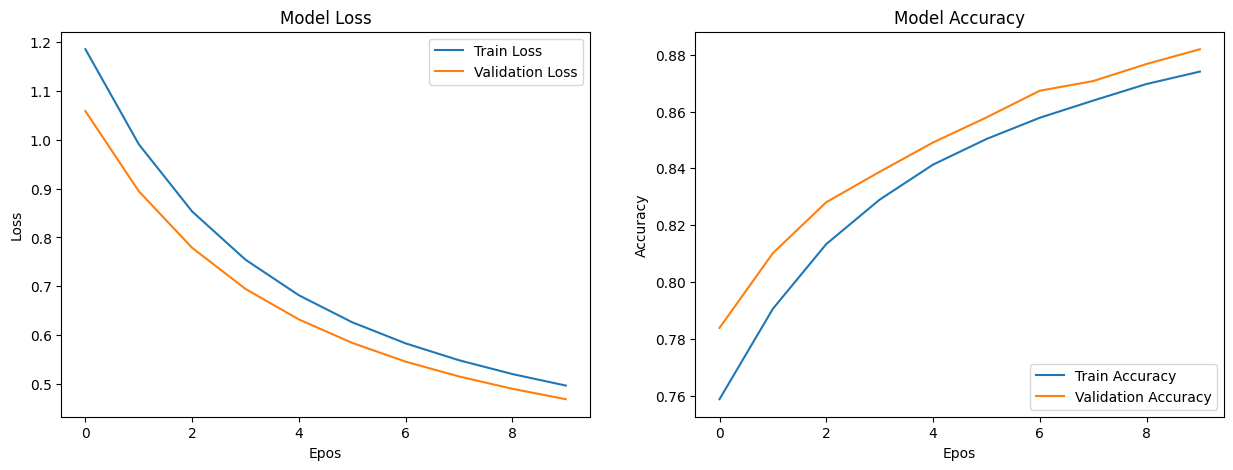

In [ ]:
# --- f. Plot the training loss and accuracy ---
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epos')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epos')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten,Dense

In [ ]:
# Load CSVs
train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

# Separate labels and pixel data
y_train = train_df.iloc[:,-1].values
x_train = train_df.iloc[:,:-1].values

y_test = test_df.iloc[:, -1].values
x_test = test_df.iloc[:,:-1].values

# print(x_train.shape, y_train.shape)
# (50000, 3072) (50000,)

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(x_train.shape, y_train.shape)



(50000, 32, 32, 3) (50000, 10)


In [ ]:
# Define Model Architecture
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128,activation='relu',name='Hidden_Layer_2'));
model.add(Dense(10,activation='softmax',name='Output_Layer'));

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
# We use categorical crossentropy because the labels are one-hot encoded
model.compile(optimizer=SGD(),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
#Train the model using SGD
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.2819 - loss: 1.9903 - val_accuracy: 0.3721 - val_loss: 1.7770
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.3905 - loss: 1.7212 - val_accuracy: 0.4091 - val_loss: 1.6748
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4245 - loss: 1.6292 - val_accuracy: 0.4272 - val_loss: 1.6232
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4428 - loss: 1.5743 - val_accuracy: 0.4507 - val_loss: 1.5698
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.4632 - loss: 1.5276 - val_accuracy: 0.4456 - val_loss: 1.5500
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4754 - loss: 1.4792 - val_accuracy: 0.4705 - val_loss: 1.5229
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.4883 - loss: 1.4484 - val_accuracy: 0.4728 - val_loss: 1.4917
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.5023 -

In [ ]:
# --- e. Evaluate the network ---
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(f'test_accuracy:{test_accuracy*100:.4f}%')
print(f'test_loss:{test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4733 - loss: 1.4792
test_accuracy:46.9900%
test_loss:1.4833


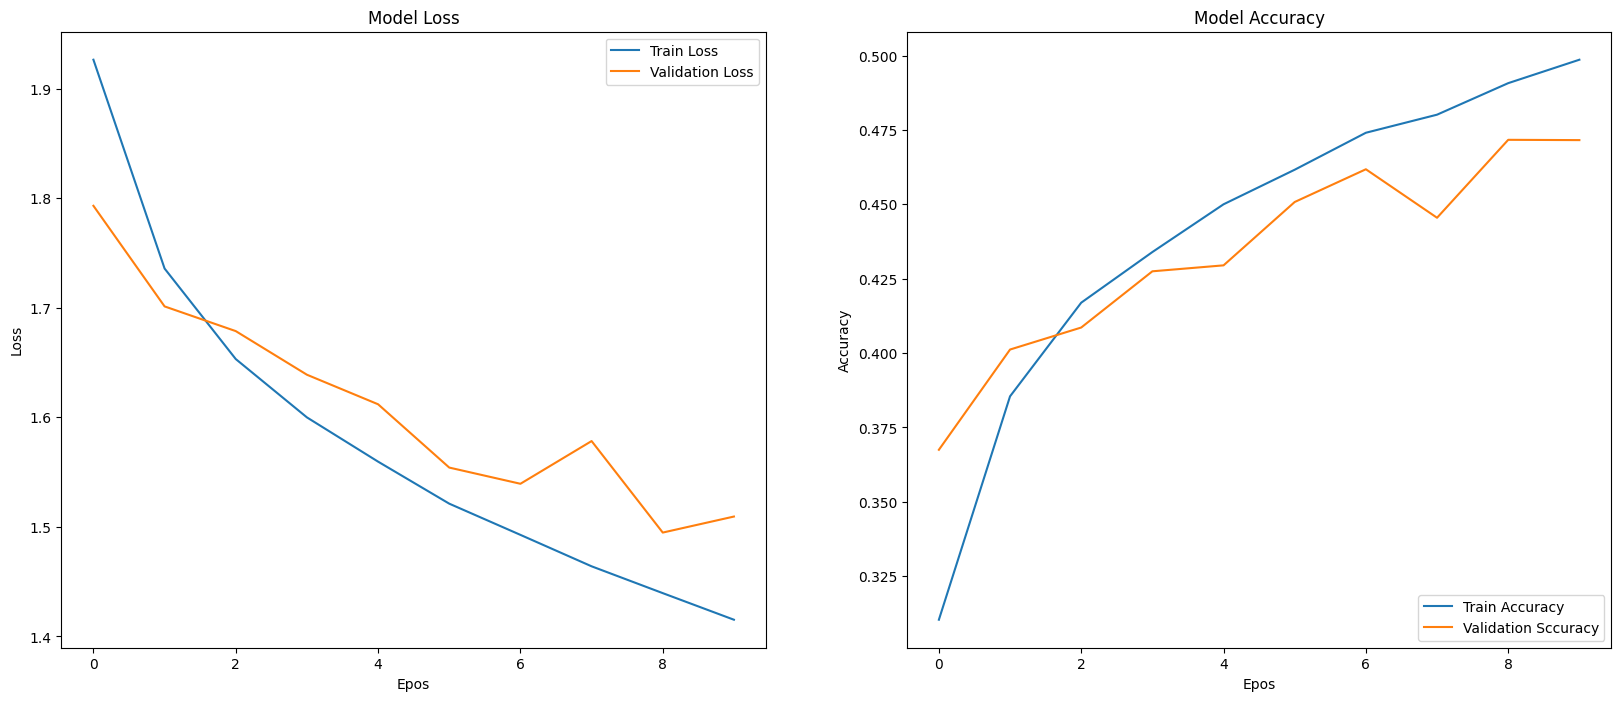

In [ ]:
# --- f. Plot the training loss and accuracy ---

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epos')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Sccuracy')
plt.title('Model Accuracy')
plt.xlabel('Epos')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

📥 Loaded and prepared data (MNIST dataset — images of handwritten digits)

🔢 Preprocessed it (normalized, reshaped, encoded)

🧱 Built a neural network model

⚙️ Compiled the model (set loss, optimizer, metrics)

🚀 Trained the model (fit on training data)

📊 Evaluated and visualized results (loss and accuracy curves)